In [43]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [31]:
# Generate N pairs of random values, separate x and y values
N = 100 
values = np.random.rand(100,2)
x,y = values[:,0], values[:,1]

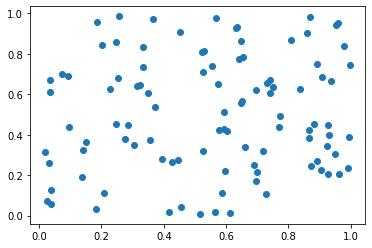

In [34]:
# Plot the points 
plt.scatter(x,y)

In [54]:
# Pick K random points as initial cluster for centroids  
k = 3 
random_choice = np.random.randint(100, size=(1,3))
centroids = values[random_choice]
random_choice = random_choice.tolist()[0]

<ipython-input-60-188a91088b0c>:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  plt.scatter(x,y in centroids)


ValueError: x and y must be the same size

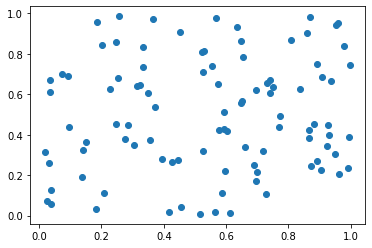

In [60]:
# Plot the highlighted centroids values
remVals = np.delete(values, random_choice,axis=0)
plt.scatter(remVals[:,0], remVals[:,1])
git
plt.scatter(centroids[:,0], centroids[:,1])